In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [2]:
from functools import reduce

df1 = pd.read_csv('Documents/Police Project/Stop - Basic Details/ripa_stops_datasd.csv',sep=',')
df2 = pd.read_csv('Documents/Police Project/Stop - Reason for stop/ripa_stop_reason_datasd.csv',sep=',')
df3 = pd.read_csv('Documents/Police Project/Stop - Race/ripa_race_datasd.csv',sep=',')
df4 = pd.read_csv('Documents/Police Project/Stop - Result/ripa_stop_result_datasd.csv',sep=',')
df5 = pd.read_csv('Documents/Police Project/Stop - Actions Taken/ripa_actions_taken_datasd.csv',sep=',')

//anaconda3/envs/unit2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda3/envs/unit2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Merge dataframes
df_merged_1 = pd.merge(df1, df2, how='inner')
df_merged_2 = pd.merge(df3, df4, how='inner')
df_merged_3= pd.merge(df_merged_1, df_merged_2, how='inner')
df = pd.merge(df_merged_3, df5, how='inner')

print(df.shape)
df.head()

(321815, 41)


,stop_id,ori,agency,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,...,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,resultkey,result,code,resulttext,action,consented
0,2443,CA0371100,SD,10,2018-07-01,00:01:37,30,0,1,"Patrol, traffic enforcement, field operations",...,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk",White,6,Custodial Arrest without warrant,64005.0,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,None,NaN
1,2444,CA0371100,SD,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,2,Warning (verbal or written),54395.0,22349(B) VC - EXC 55MPH SPEED:2 LANE RD (I) 54395,None,NaN
2,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
3,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,1,No Action,NaN,NaN,Curbside detention,NaN
4,2448,CA0371100,SD,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,1,No Action,NaN,NaN,None,NaN


In [4]:
# pandas_profiling.ProfileReport(df)

In [5]:
cols = df.columns.tolist()
cols

['stop_id',
 'ori',
 'agency',
 'exp_years',
 'stopdate',
 'stoptime',
 'stopduration',
 'stop_in_response_to_cfs',
 'officer_assignment_key',
 'assignment',
 'intersection',
 'block',
 'land_mark',
 'street',
 'highway_exit',
 'isschool',
 'school_name',
 'cityname',
 'beat',
 'beat_name',
 'pid',
 'isstudent',
 'perceived_limited_english',
 'perceived_age',
 'perceived_gender',
 'gender_nonconforming',
 'gend',
 'gend_nc',
 'perceived_lgbt',
 'reason_for_stop',
 'reason_for_stopcode',
 'reason_for_stop_code_text',
 'reason_for_stop_detail',
 'reason_for_stop_explanation',
 'race',
 'resultkey',
 'result',
 'code',
 'resulttext',
 'action',
 'consented']

In [6]:
# dropping columns for missing values, constant values, etc.
df = df.drop(['agency', 'ori', 'block', 'gend_nc', 
         'highway_exit', 'intersection', 'land_mark',
         'school_name', 'street', 'gender_nonconforming', 
              'pid', 'consented', 'resulttext', 'code',
              'beat', 'resultkey','reason_for_stopcode'], axis=1)
df.shape

(321815, 24)

In [7]:
# Will need to drop 'consented'. Not because consent isn't important, 
# but for a citation, consent isn't necessary. It also has several NaN values
# Will revisit if it needs to be addressed
mask = (df['result'] == 'Citation for infraction')
print(df[mask].shape)
df[mask].head()

(46469, 24)


,stop_id,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,isschool,cityname,...,perceived_gender,gend,perceived_lgbt,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action
25,2462,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098,Moving Violation,FAILURE TO STOP AT RED LIGHT,Middle Eastern or South Asian,Citation for infraction,None
33,2473,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,lidar @ 54 mph in a posted 35 mph zone,White,Citation for infraction,None
93,2512,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Female,2,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Equipment Violation,Right front headlight out. Stop revealed regis...,Asian,Citation for infraction,None
95,2514,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Reasonable Suspicion,25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,Officer witnessed commission of a crime,the male was holding an open can of beer,White,Citation for infraction,Curbside detention
109,2520,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,"Non-moving Violation, including Registration V...",SUSPENDED DRIVER'S LICENSE,White,Citation for infraction,Vehicle impounded


In [8]:
test = df[mask]
test.head()

,stop_id,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,isschool,cityname,...,perceived_gender,gend,perceived_lgbt,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action
25,2462,1,2018-07-01,01:03:00,15,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098,Moving Violation,FAILURE TO STOP AT RED LIGHT,Middle Eastern or South Asian,Citation for infraction,None
33,2473,2,2018-07-01,01:52:51,12,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,lidar @ 54 mph in a posted 35 mph zone,White,Citation for infraction,None
93,2512,1,2018-07-01,05:00:49,20,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Female,2,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Equipment Violation,Right front headlight out. Stop revealed regis...,Asian,Citation for infraction,None
95,2514,10,2018-07-01,05:29:26,15,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Reasonable Suspicion,25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,Officer witnessed commission of a crime,the male was holding an open can of beer,White,Citation for infraction,Curbside detention
109,2520,1,2018-07-01,05:42:21,83,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,"Non-moving Violation, including Registration V...",SUSPENDED DRIVER'S LICENSE,White,Citation for infraction,Vehicle impounded


In [9]:
list = ['No Action','Warning (verbal or written)', 'Field interview card completed', 'Citation for infraction']
test = df[df.result.isin(list)]
test.shape

(176370, 24)

In [10]:
test.result.value_counts()

Field interview card completed    61602
Citation for infraction           46469
Warning (verbal or written)       36003
No Action                         32296
Name: result, dtype: int64

In [11]:
df = df[df.result.isin(list)]
df.shape

(176370, 24)

In [12]:
df.head()

,stop_id,exp_years,stopdate,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,isschool,cityname,...,perceived_gender,gend,perceived_lgbt,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action
1,2444,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,Warning (verbal or written),None
2,2447,1,2018-07-01,00:05:43,15,1,10,Other,0,SAN DIEGO,...,Male,1,No,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,No Action,Curbside detention
3,2447,1,2018-07-01,00:05:43,15,1,10,Other,0,SAN DIEGO,...,Female,2,No,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,No Action,Curbside detention
4,2448,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,...,Male,1,No,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,No Action,None
16,2454,4,2018-07-01,00:33:19,3,0,2,Gang enforcement,0,SAN DIEGO,...,Male,1,No,Traffic Violation,4000(A) VC - NO REG:VEH/TRAILER/ETC (I) 54099,"Non-moving Violation, including Registration V...",Pursuit of justice,Black/African American,No Action,None


In [13]:
# Engineering month, year features
df.stopdate = pd.to_datetime(df.stopdate, infer_datetime_format=True)
df['month'] = df.stopdate.dt.month
df['year'] = df.stopdate.dt.year
df['day'] = df.stopdate.dt.day

df = df.drop(columns='stopdate')
df.head()

,stop_id,exp_years,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,isschool,cityname,beat_name,...,reason_for_stop,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action,month,year,day
1,2444,18,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,Mission Beach 121,...,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,Warning (verbal or written),None,7,2018,1
2,2447,1,00:05:43,15,1,10,Other,0,SAN DIEGO,El Cerrito 822,...,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
3,2447,1,00:05:43,15,1,10,Other,0,SAN DIEGO,El Cerrito 822,...,Reasonable Suspicion,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1
4,2448,3,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,Ocean Beach 614,...,Traffic Violation,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,No Action,None,7,2018,1
16,2454,4,00:33:19,3,0,2,Gang enforcement,0,SAN DIEGO,Colina Del Sol 826,...,Traffic Violation,4000(A) VC - NO REG:VEH/TRAILER/ETC (I) 54099,"Non-moving Violation, including Registration V...",Pursuit of justice,Black/African American,No Action,None,7,2018,1


In [14]:
df.result.value_counts()

Field interview card completed    61602
Citation for infraction           46469
Warning (verbal or written)       36003
No Action                         32296
Name: result, dtype: int64

In [15]:
df['ticket'] = df['result'] == 'Citation for infraction '
df.head()

,stop_id,exp_years,stoptime,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,isschool,cityname,beat_name,...,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,race,result,action,month,year,day,ticket
1,2444,18,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,Mission Beach 121,...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding,White,Warning (verbal or written),None,7,2018,1,False
2,2447,1,00:05:43,15,1,10,Other,0,SAN DIEGO,El Cerrito 822,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,False
3,2447,1,00:05:43,15,1,10,Other,0,SAN DIEGO,El Cerrito 822,...,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.,Hispanic/Latino/a,No Action,Curbside detention,7,2018,1,False
4,2448,3,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",0,SAN DIEGO,Ocean Beach 614,...,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING,White,No Action,None,7,2018,1,False
16,2454,4,00:33:19,3,0,2,Gang enforcement,0,SAN DIEGO,Colina Del Sol 826,...,4000(A) VC - NO REG:VEH/TRAILER/ETC (I) 54099,"Non-moving Violation, including Registration V...",Pursuit of justice,Black/African American,No Action,None,7,2018,1,False


In [16]:
# get features and target

target = 'result'

features = df.columns.drop('result')

In [17]:
features

Index(['stop_id', 'exp_years', 'stoptime', 'stopduration',
       'stop_in_response_to_cfs', 'officer_assignment_key', 'assignment',
       'isschool', 'cityname', 'beat_name', 'isstudent',
       'perceived_limited_english', 'perceived_age', 'perceived_gender',
       'gend', 'perceived_lgbt', 'reason_for_stop',
       'reason_for_stop_code_text', 'reason_for_stop_detail',
       'reason_for_stop_explanation', 'race', 'action', 'month', 'year', 'day',
       'ticket'],
      dtype='object')

In [18]:
df.shape

(176370, 27)

In [19]:
train = df
train.shape

(176370, 27)

In [20]:
from sklearn.model_selection import train_test_split

# Split train into train & test, then will split train again into train and val
train, test = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=42)
train.shape, test.shape

((141096, 27), (35274, 27))

In [21]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['result'], random_state=42)
train.shape,val.shape,test.shape

((112876, 27), (28220, 27), (35274, 27))

In [22]:
# Arrange data into X features matrix and y target vector
target = 'result'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test
y_test = test[target]
# Check shapes
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (112876, 26)
y_train shape (112876,)
X_val shape (28220, 26)
y_val shape (28220,)
X_test shape (35274, 27)
y_test shape (35274,)


In [23]:
df.isnull().sum()

stop_id                            0
exp_years                          0
stoptime                           0
stopduration                       0
stop_in_response_to_cfs            0
officer_assignment_key             0
assignment                         0
isschool                           0
cityname                           0
beat_name                          0
isstudent                          0
perceived_limited_english          0
perceived_age                      0
perceived_gender                  65
gend                               0
perceived_lgbt                     0
reason_for_stop                    0
reason_for_stop_code_text      11240
reason_for_stop_detail         11239
reason_for_stop_explanation        1
race                               0
result                             0
action                             0
month                              0
year                               0
day                                0
ticket                             0
d

# Get accuracy score for majority baseline

In [24]:
# Get accuracy score for majority class baseline
y_train.value_counts(normalize=True)

Field interview card completed    0.349277
Citation for infraction           0.263475
Warning (verbal or written)       0.204127
No Action                         0.183121
Name: result, dtype: float64

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.3492912827781715

In [26]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
#     SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7062012756909993


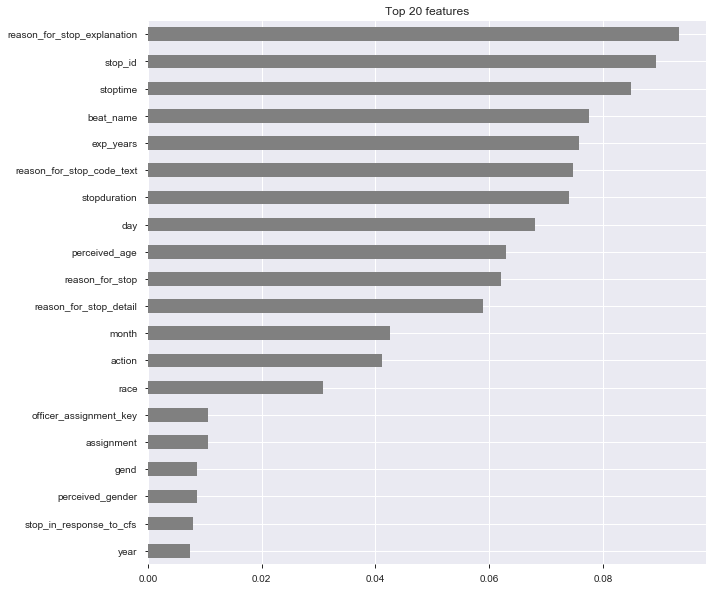

In [27]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n=20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [28]:
# Going to get permutation importance


# eli5 doesn't work well with pipelines, so need to decosntruct a little bit for it to work
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# Going to instantiate the permuter class to get the permutation importance
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1175 ± 0.0032,reason_for_stop
0.0903 ± 0.0045,stopduration
0.0771 ± 0.0018,exp_years
0.0588 ± 0.0006,reason_for_stop_detail
0.0569 ± 0.0033,action
0.0548 ± 0.0012,reason_for_stop_code_text
0.0398 ± 0.0034,reason_for_stop_explanation
0.0313 ± 0.0026,beat_name
0.0266 ± 0.0015,stop_id
0.0264 ± 0.0015,stoptime


In [29]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (112876, 26)


In [30]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

print('Shape after removing features:', X_train.shape)

Shape after removing features: (112876, 23)


In [31]:
X_val = X_val[features]

In [32]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7007087172218285


# Use xgboost for gradient boosting

In [33]:
from xgboost import XGBClassifier

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

gb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['stoptime', 'assignment', 'cityname',
                                      'beat_name', 'perceived_gender',
                                      'perceived_lgbt', 'reason_for_stop',
                                      'reason_for_stop_code_text',
                                      'reason_for_stop_detail',
                                      'reason_for_stop_explanation', 'race',
                                      'action'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col'...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bytree=1, gamma=0,
                               learning_rate=0.1, max_delta_step=0, max_depth=3,
                               min_child_weight=1, m

In [34]:
from sklearn.metrics import accuracy_score
y_pred = gb.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.5630758327427356


# PDP plots with categorical features

In [49]:
target = 'ticket'
features = df.columns.drop(['ticket'])

X = df[features]
y = df[target]


# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'stopduration'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);b

TypeError: cannot concatenate object of type "<class 'list'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [ ]:
features = ['stopduration', 'exp_years']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);